# HW 1: Perceptron

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions. In local Jupyter, add a new cell by using the "+" button on the toolbar), and set it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). In Colab, use the +Text button on the toolbar.

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In [114]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [125]:
# make the code reproducible 
np.random.seed(3)

## Generate Data

In [116]:
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))
print(n)
print(d)

50
2


## Visualize Data

In [117]:
def plot_perceptron(X,y,w,plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-2,2)
    plt.ylim(-2,2)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
    plt.show()

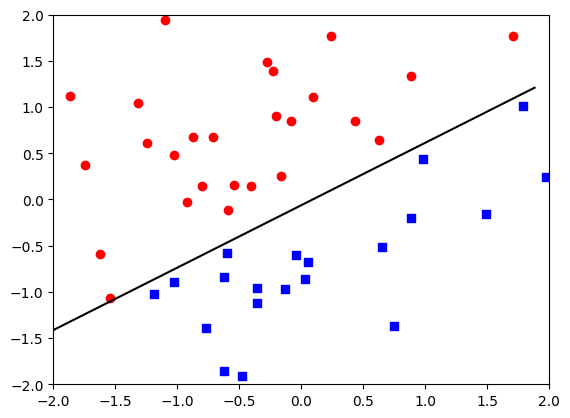

In [118]:
plot_perceptron(X,y,w_true)

## a) Code the missing parts of the Perceptron algorithm

Inputs to Perceptron are:

required arguments: <br>
X = data points <br>
Y = true values <br>

optional arguments: <br>
maxchecks = maximum number of data points to look out, which may or may not violate the perceptron condition (default: 1000) <br>
maxiters = maximum number of updates to w (default: 100) <br>
w_0 = initial guess of w (default: random) <br>

Perceptron should start with the input guess of w, look at most maxchecks data points and make at most maxiters updates, and return the final w.

In [119]:
# Python does not allow the argument of a function to depend on another argument, 
# so we bypass the issue by setting w_0 = None and assigning it immediately in the function
def perceptron(X=X,y=y,w_0=None,maxchecks=1000,maxiters=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])

    w = w_0

    t = 0
    while t <= maxiters:
        ismisclassified = False
        for i in range(maxchecks):
            xi = X.to_numpy()[i]
            yi = y[i]
            prediction = np.dot(w, xi)
            agreement = prediction * yi
            if agreement <= 0:
                ismisclassified = True
                w = w + np.dot(yi, xi)
                t += 1
                break

        if not ismisclassified:
            print("there requires ", t, "iterations to converge")
            return w

    ### ENTER YOUR CODE HERE
    print("there requires more than ", maxiters, "iterations to converge")
    return w

## b) Run perceptron on the above linearly separable data set

there requires  8 iterations to converge


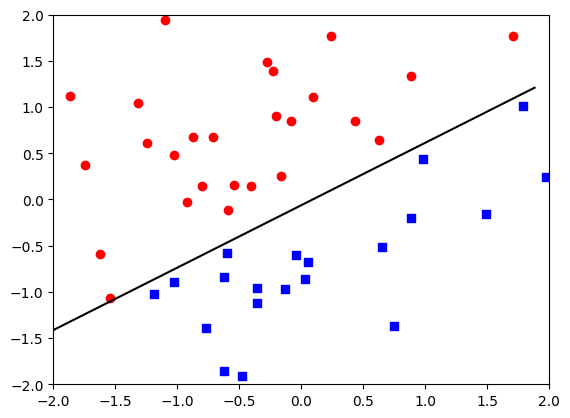

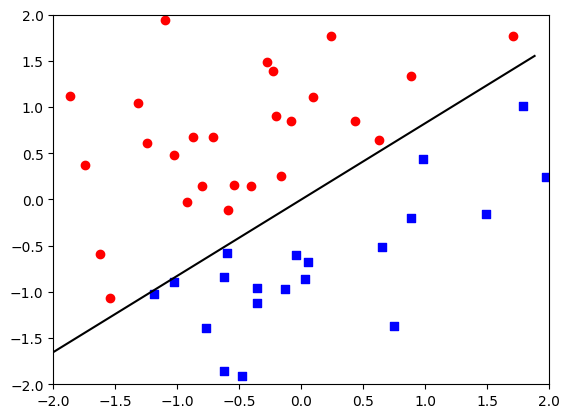

In [120]:
w_0 = np.zeros(X.shape[1])
w = perceptron(X,y,w_0,50,100)
plot_perceptron(X,y,w_true)
plot_perceptron(X,y,w)

there requires  4 iterations to converge


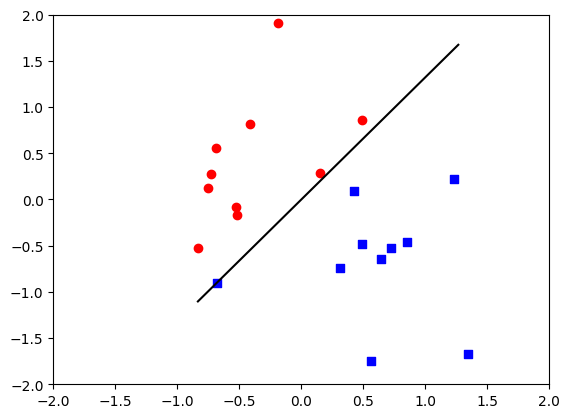

In [121]:
n1 = 20
feature_dict1 = {'feature 1': randn(n1),
                'feature 2': randn(n1),
                'offset':    np.ones(n1)}
X1 = pd.DataFrame(data=feature_dict1)
y1 = np.sign(X1.dot(w_true))
w1 = perceptron(X1,y1,w_0,n1,100)
plot_perceptron(X1,y1,w1)

there requires  97 iterations to converge


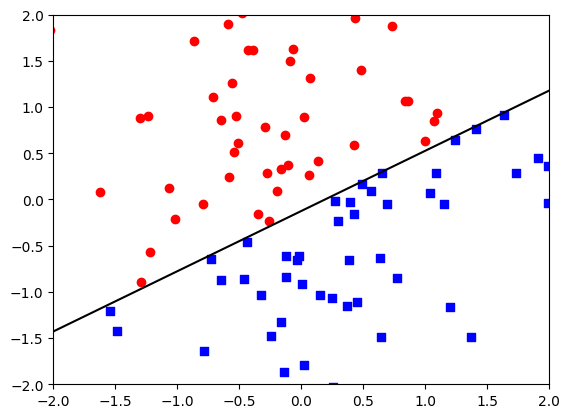

In [122]:
n2 = 100
feature_dict2 = {'feature 1': randn(n2),
                'feature 2': randn(n2),
                'offset':    np.ones(n2)}
X2 = pd.DataFrame(data=feature_dict2)
y2 = np.sign(X2.dot(w_true))
w2 = perceptron(X2,y2,w_0,n2,100)
plot_perceptron(X2,y2,w2)

there requires more than  1000 iterations to converge


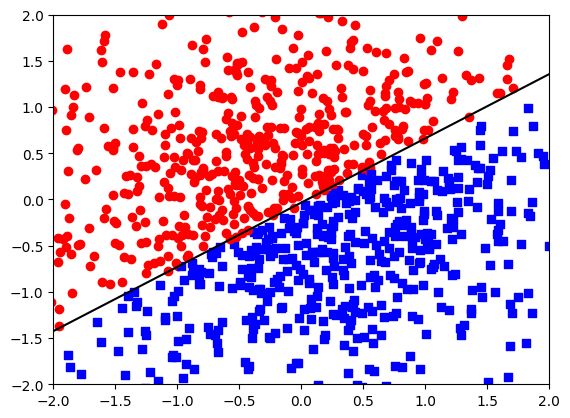

In [123]:
n3 = 1000
feature_dict3 = {'feature 1': randn(n3),
                'feature 2': randn(n3),
                'offset':    np.ones(n3)}
X3 = pd.DataFrame(data=feature_dict3)
y3 = np.sign(X3.dot(w_true))
w3 = perceptron(X3,y3,w_0,n3,1000)
plot_perceptron(X3,y3,w3)

## d) Run perceptron on data set of size n=1000 with dimension d=10

there requires more than  100 iterations to converge


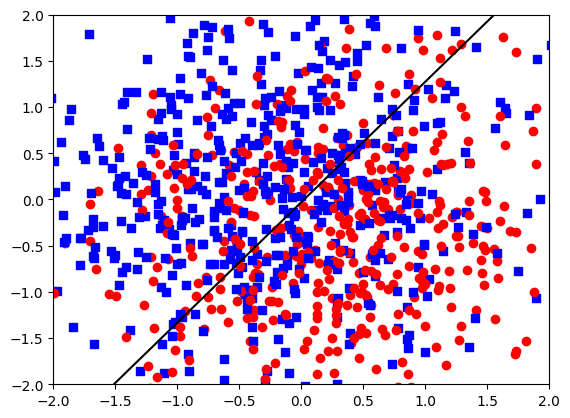

In [113]:
n4 = 1000
d4 = 10
feature_dict4 = {}

for i in range(1,d4+1):
    feature_name = 'feature ' + str(i)
    feature_dict4[feature_name] = randn(n4)

feature_dict4["offset"] = np.ones(n4)

# print(feature_dict4)
X4 = pd.DataFrame(data=feature_dict4)
w_true = pd.Series(randn(d4+1), index=X4.columns)
y4 = np.sign(X4.dot(w_true))

w_0 = np.zeros(X4.shape[1])
w4 = perceptron(X4,y4,w_0,n4,1000)
plot_perceptron(X4,y4,w4)


## e) Run perceptron on dataset from (d) 100 times

Plot a histogram for the number of updates that the algorithm takes to converge. By convergence, we mean the distance between the normalized weight vectors is smaller than some small $\epsilon>0$. For purposes of this problem, choose $\epsilon = 0.1$.

For this portion, make sure your perceptron implementation picks the next consideration point randomly instead of deterministically.

In [ ]:
### STUDENT
# Create a helper function that computes the euclidean distance between normalized versions of vectors x,y
def distance(x,y):
    ### ENTER YOUR CODE HERE
    return np.linalg.norm(x-y)

In [ ]:
### STUDENT 
def perceptron_e(X=X,y=y,w_0=None,epsilon=0.1,w_true=w_true):
    if w_0 is None:
        w_0 = randn(X.shape[1])

    w = w_0
    steps = 0

    while (distance(w_true, w) >= epsilon):
        ismisclassified = False
        for i in range(maxchecks):
            xi = X.to_numpy()[i]
            yi = y[i]
            prediction = np.dot(w, xi)
            agreement = prediction * yi
            if agreement <= 0:
                ismisclassified = True
                w = w + np.dot(yi, xi)
                t += 1
                break

        if not ismisclassified:
            print("there requires ", t, "iterations to converge")
            return w


    ### ENTER YOUR CODE HERE
    return w, steps

## f)  Summarize your conclusions with respect to accuracy and running time as a function of n (size of data set) and d (dimension). 

For this part, assume the data is not linearly separable and given a 1-2 sentence qualitative response for all 4 cases (accuracy/running time vs $n$/$d$). (If your perceptron always converges, then the accuracy will be perfect; if you stop before convergence, eg because it's taking too long to run, your accuracy will be less than perfect.)

**RESPONSE: **The bigger n and d is, the higher running time and lower accuracy.

## g) Run the perceptron from part (a) on the dataset with an outlier given below. What happens?

there requires  591 iterations to converge


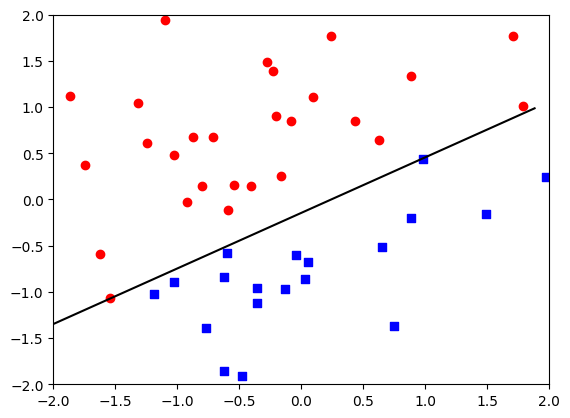

In [124]:
# (re)generate data with same random seed, adding one outlier
np.random.seed(3)

n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

y[0] = -y[0]
w_0 = np.zeros(X.shape[1])
w = perceptron(X,y,w_0,n,1000)
plot_perceptron(X,y,w)

**ANSWER:**
it requires much more iterations than without the outlier.

## h) Try out one idea to fix perceptron
Ideas to get started:
* how could you identify points that are persistently misclassified, or points whose updates cause many other points to become misclassified?
* could you remember good models you saw along the way, even if the final model is bad?